<a href="https://colab.research.google.com/github/jdmartinev/MachineLearning/blob/main/Talleres/2b_Deteccion_de_anomalias_IF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Taller 2b: Detección de anomalías con Isolation Forest



In [1]:
#Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
random_state = 1234

In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jQ0c0R9lPUGmqHjwbxlwqvYBmor6Bf-e' -O creditcard.pkl

--2023-10-31 04:05:57--  https://docs.google.com/uc?export=download&id=1jQ0c0R9lPUGmqHjwbxlwqvYBmor6Bf-e
Resolving docs.google.com (docs.google.com)... 74.125.201.138, 74.125.201.139, 74.125.201.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.201.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0bunog05fpdudt9km56hh9td6m807ilr/1698725100000/02109188480849179502/*/1jQ0c0R9lPUGmqHjwbxlwqvYBmor6Bf-e?e=download&uuid=d3f2f4a2-fc94-4ba2-989d-abad37ade423 [following]
--2023-10-31 04:06:01--  https://doc-10-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0bunog05fpdudt9km56hh9td6m807ilr/1698725100000/02109188480849179502/*/1jQ0c0R9lPUGmqHjwbxlwqvYBmor6Bf-e?e=download&uuid=d3f2f4a2-fc94-4ba2-989d-abad37ade423
Resolving doc-10-bk-docs.googleusercontent.com (doc-10-bk-docs.googleusercontent.com)... 173.194.196.132, 2607:f8b0

In [3]:
#Cargamos los datos
df = pd.read_pickle('creditcard.pkl')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    284315
1       492
Name: Class, dtype: int64


<Axes: >

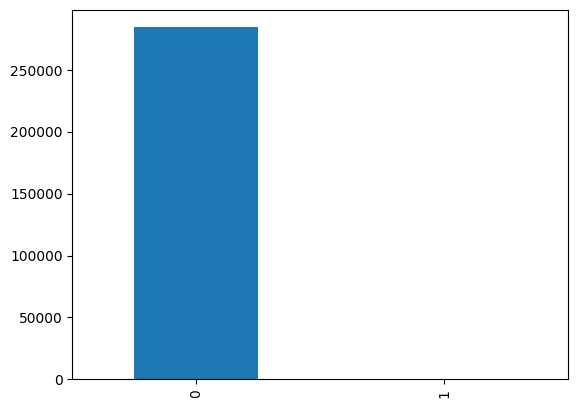

In [4]:
#Exploramos la variable objetivo
print(df.Class.value_counts())
df.Class.value_counts().plot(kind='bar')

In [ ]:
# Separemos nuestros datos en conjuntos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='Class'),
    df['Class'],
    test_size=0.2,
    stratify=df['Class'],
    random_state=random_state
)

In [ ]:
#Entrenaremos un classificador RandomForest para resolver este problema
rf_base = RandomForestClassifier(random_state=random_state)

pipeline_rf = Pipeline(steps = [
        ('classifier', rf_base),
                            ])

# Definamos la malla de parámetros sobre la que haremos la búsqueda:
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': list(range(2, 8)),
    'classifier__min_samples_leaf': [1, 10, 50]
}

# Definamos nuestros modelo mediante GridSearchCV:
rf = GridSearchCV(pipeline_rf, param_grid=param_grid)

In [ ]:
# Entrenemos el random forest:
rf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=1234))]),
             param_grid={'classifier__max_depth': [2, 3, 4, 5, 6, 7],
                         'classifier__min_samples_leaf': [1, 10, 50],
                         'classifier__n_estimators': [50, 100]})

In [ ]:
rf.best_params_

{'classifier__max_depth': 7,
 'classifier__min_samples_leaf': 1,
 'classifier__n_estimators': 50}

In [ ]:
# Obtengamos la accuracy y el F1 score de entrenamiento
print("Training set")
print(f'Accuracy: {rf.score(X_train, y_train)}')
print(f"F1 score: {f1_score(y_train, rf.predict(X_train), average='macro')}")
print('\n')

Training set
Accuracy: 0.9996576620070662
F1 score: 0.9452924324533583




In [ ]:
# Obtengamos la accuracy y el F1 score de prueba para cada modelo:
print("Test set")
print(f'Accuracy: {rf.score(X_test, y_test)}')
print(f"F1 score: {f1_score(y_test, rf.predict(X_test), average='macro')}")
print('\n')

Test set
Accuracy: 0.9995962220427653
F1 score: 0.9363629832748375




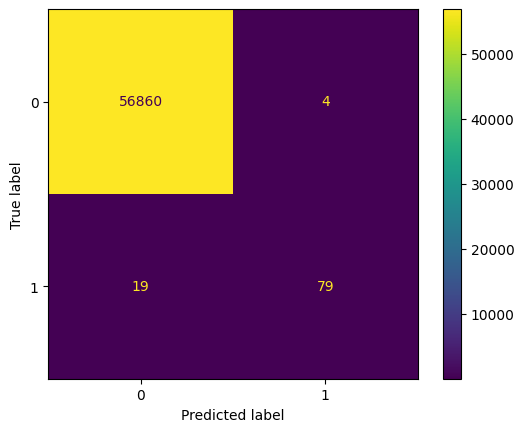

In [ ]:
# Grafiquemos la matriz de confusión del random foresr para los datos de prueba (sin normalizar):
cm = confusion_matrix(y_test,rf.predict(X_test))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [5]:
#Ahora, entrenemos un modelo basado en Isolation Forest
#Tip: Isolation forest de sklearn devuelve -1 para outliers y 1 para inliers.
#Por esta razón, se deben mapear los -1 devueltos por el modelo para poder calcular
#las métricas de validación que se utilizan
X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='Class'),
    df['Class'],
    test_size=0.2,
    stratify=df['Class'],
    random_state=random_state
)

param_grid = {
    'contamination': [0.01, 0.02, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'max_samples': ['auto', 0.5, 0.75, 1.0],
    'max_features': [1.0, 0.5, 0.75],
    'bootstrap': [True, False]
}

from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV

def custom_scorer(y_true, y_pred):
    # Transformar las salidas del modelo (-1 para anomalías, 1 para inliers)
    y_pred = (y_pred == -1).astype(int)
    # Calcular F1 score
    score = f1_score(y_true, y_pred)
    return score

# Crear un objeto scorer utilizando la función custom_scorer
scorer = make_scorer(custom_scorer, greater_is_better=True)

# Crear el objeto GridSearchCV con el scorer personalizado
grid_search = GridSearchCV(IsolationForest(), param_grid, scoring=scorer, n_jobs=-1, cv=5)

# Ajustar la búsqueda de cuadrícula
grid_search.fit(X_train, y_train)

# Mostrar los resultados
print("Mejores parámetros: ", grid_search.best_params_)
print("Mejor F1 score: ", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Mejores parámetros:  {'bootstrap': False, 'contamination': 0.01, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 100}
Mejor F1 score:  0.2130525533110464


In [6]:
model = IsolationForest(bootstrap= False, contamination=0.01, max_features=0.5, max_samples=1.0, n_estimators=100)
model.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01, max_features=0.5, max_samples=1.0)

In [7]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_train_pred = (y_train_pred == -1).astype(int)
y_test_pred = (y_test_pred == -1).astype(int)

In [8]:
#Calcular el accuracy y F1 score de Isolation forest en los conjuntos de entrenamiento y test

accuracy_train = accuracy_score(y_train, y_train_pred)
f1_score_train = f1_score(y_train, y_train_pred)

# Calcular accuracy y F1 score para el conjunto de test
accuracy_test = accuracy_score(y_test, y_test_pred)
f1_score_test = f1_score(y_test, y_test_pred)

print("Entrenamiento: Accuracy = {:.2f}, F1 Score = {:.2f}".format(accuracy_train, f1_score_train))
print("est: Accuracy = {:.2f}, F1 Score = {:.2f}".format(accuracy_test, f1_score_test))


Entrenamiento: Accuracy = 0.99, F1 Score = 0.20
est: Accuracy = 0.99, F1 Score = 0.21


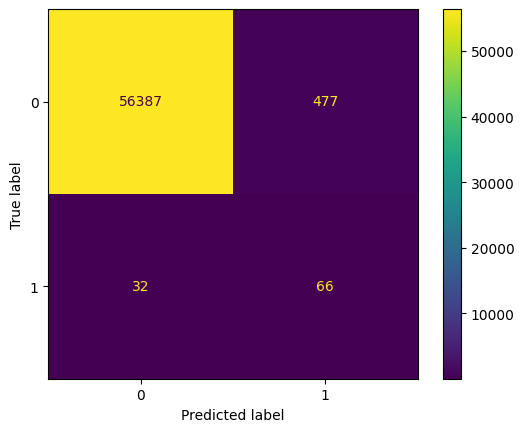

In [9]:
#Graficar la matriz de confusión para Isolation forest
cm = confusion_matrix(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()